In [1]:
import sklearn.datasets

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [4]:
X = breast_cancer.data
y = breast_cancer.target

In [5]:
data = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [6]:
data['class'] = breast_cancer.target

In [7]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
print(data['class'].value_counts())

class
1    357
0    212
Name: count, dtype: int64


In [9]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [10]:
X = data.drop('class',axis=1)

In [11]:
XT, Xt, yT, yt = train_test_split(X,y, test_size=0.1, stratify=y, random_state=1)

In [12]:
print(y.mean(),yt.mean(),yT.mean())

0.6274165202108963 0.631578947368421 0.626953125


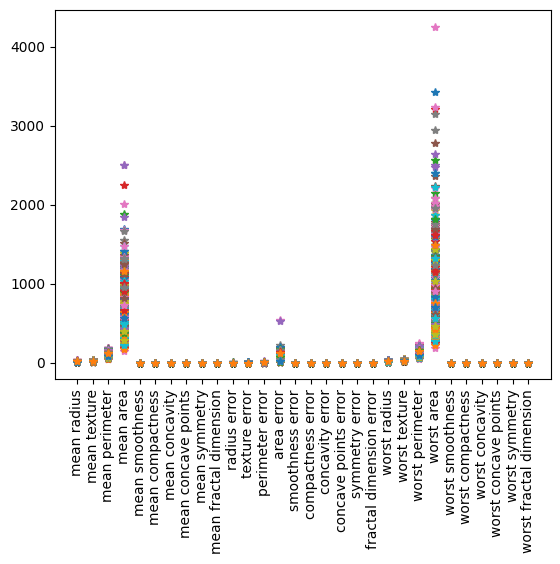

In [13]:
plt.plot(XT.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [14]:
def lambda_function(x):
  if x < 1000:
    return 0
  else:
    return 1

In [15]:
X_Binarised_3_Train = XT['mean area'].map(lambda_function)

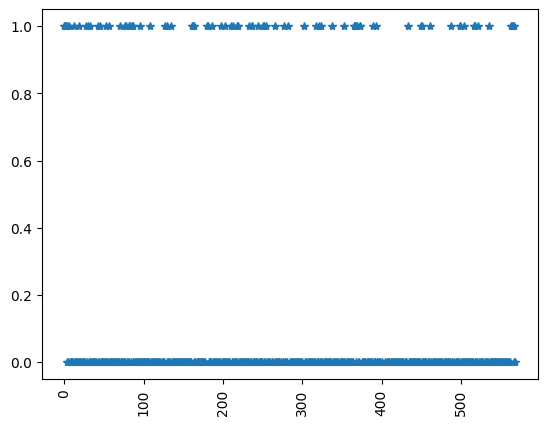

In [16]:
plt.plot(X_Binarised_3_Train.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [17]:
X_Binarised_Train = XT.apply(pd.cut, bins = 2, labels = [0,1])
X_Binarised_Test = Xt.apply(pd.cut, bins = 2, labels = [0,1])

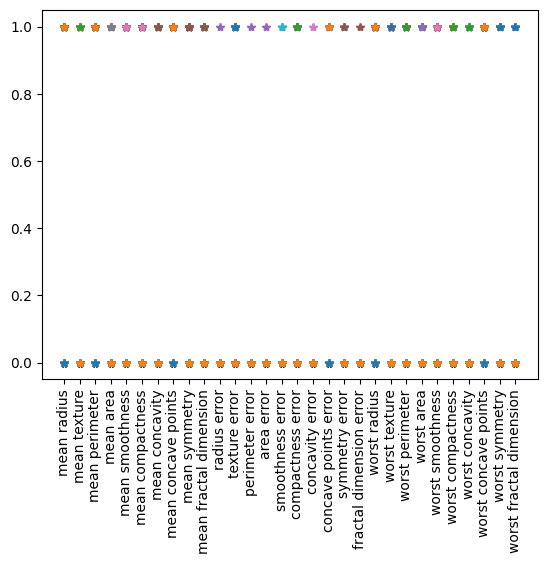

In [18]:
plt.plot(X_Binarised_Train.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

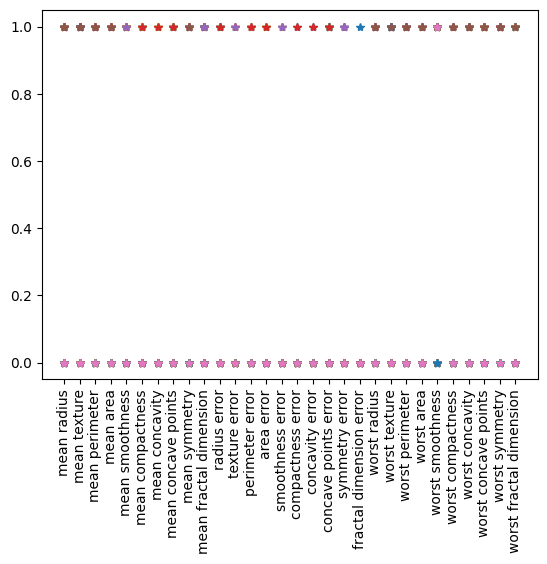

In [19]:
plt.plot(X_Binarised_Test.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [20]:
X_Binarised_Train = X_Binarised_Train.values
X_Binarised_Test = X_Binarised_Test.values

##  MP Neuron Model

In [21]:
from random import randint

In [30]:
b = 3
i = randint(1,X_Binarised_Train.shape[0])

print("For row", i)
if(np.sum(X_Binarised_Train[i,:])>=b):
    print("Malignant")
else:
    print("Benign")

if(yT[i] == 1):
    print("Truth: Malignant")
else:
    print("Truth Benign")

For row 367
Benign
Truth: Malignant


In [35]:
for b in range(X_Binarised_Train.shape[1]+1):
    Y_pred_Train = []
    accurate_rows = 0

    for x,y in zip(X_Binarised_Train,yT):
        y_pred = (np.sum(x) >= b)
        Y_pred_Train.append(y_pred)
        accurate_rows += (y==y_pred)

    print(b,accurate_rows,accurate_rows/X_Binarised_Train.shape[0])

0 321 0.626953125
1 123 0.240234375
2 95 0.185546875
3 77 0.150390625
4 79 0.154296875
5 93 0.181640625
6 110 0.21484375
7 125 0.244140625
8 141 0.275390625
9 153 0.298828125
10 160 0.3125
11 168 0.328125
12 172 0.3359375
13 176 0.34375
14 180 0.3515625
15 183 0.357421875
16 188 0.3671875
17 189 0.369140625
18 191 0.373046875
19 191 0.373046875
20 191 0.373046875
21 191 0.373046875
22 191 0.373046875
23 191 0.373046875
24 191 0.373046875
25 191 0.373046875
26 191 0.373046875
27 191 0.373046875
28 191 0.373046875
29 191 0.373046875
30 191 0.373046875


In [36]:
from sklearn.metrics import accuracy_score

In [38]:
b = 28
Y_pred_Test = []

for x in X_Binarised_Test:
    y_pred = (np.sum(x) >= b)
    Y_pred_Test.append(y_pred)

accuracy = accuracy_score(Y_pred_Test,yt)    
print(b,accuracy)

28 0.3684210526315789


In [39]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [40]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_Binarised_Train, yT)

Optimal value of b is 0
Highest accuracy is 0.626953125


In [43]:
Y_test_pred = mp_neuron.predict(X_Binarised_Test)
accuracy_test = accuracy_score(Y_test_pred, yt)

In [44]:
print(accuracy_test)

0.631578947368421


## Perceptron

In [45]:
X_train = XT.values
X_test = Xt.values

In [46]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    plt.plot(accuracy.values())
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(wt_matrix)

In [47]:
perceptron = Perceptron()

0.94921875


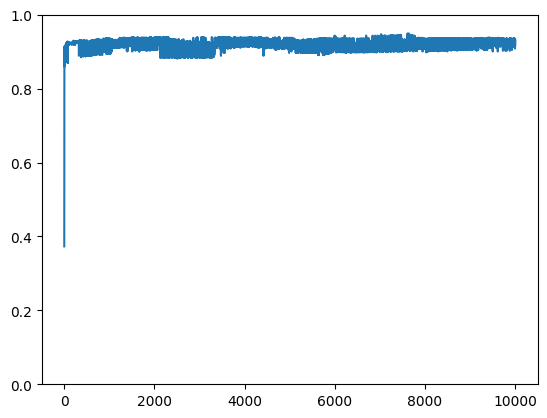

In [50]:
wt_matrix = perceptron.fit(X_train, yT, 10000, 0.5)

In [52]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, yt))

0.9473684210526315


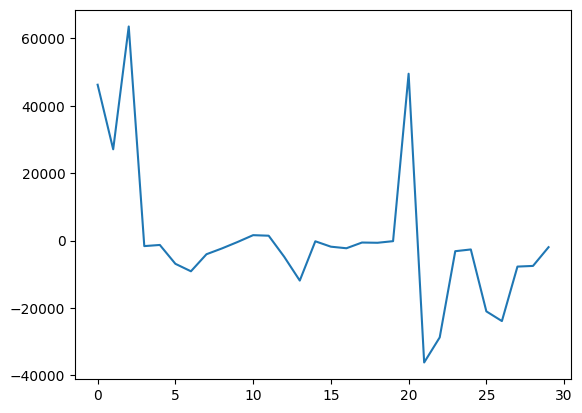

In [53]:
plt.plot(wt_matrix[-1,:])
plt.show()